In [3]:
import numpy as np
import matplotlib.pyplot as plt


def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator

def gautschi(ypp,g,omega,h,t0,te,q0,q1,v0,v1):    
    # ypp is the function that describes the double time derivative of position    
    # omega is the value assume to be part of the position's second derivative
    t = t0 + h   
    tsave = []
    ysave = []
    
    qnm1 = q0
    vnm1 = v0
    qn = q1
    vn = v1
            
    ysave.append([qnm1,vnm1])
    ysave.append([qn,vn])
    tsave.append(t0)
    tsave.append(t0 + h)
                
    while t <= te:
        t += h
        qnp1 = h**2 * (sinc(h*omega/2)**2)*g(t,qn,omega) + 2*np.cos(h*omega)*qn - qnm1
        vnp1 = 2*h*sinc(h*omega)*ypp(t,qn,omega) + vnm1
        
        ysave.append([qnp1,vnp1])
        tsave.append(t)
                

        qnm1 = qn
        vnm1 = vn
        qn = qnp1
        vn = vnp1


    return np.array(tsave), np.array(ysave)





# Constant g function

In [4]:
# First define the test function
def trueOSC(t,y0,omega):
    def mat(mu):
        return np.array([[np.cos(mu),np.sin(mu)],[-np.sin(mu),np.cos(mu)]])
                        
    D = np.diag([1,omega])
    Dinv = np.linalg.inv(D)
    mu = t*omega
    phi = mat(mu)
    
    change = np.dot(np.dot(D,phi),Dinv)
    return np.matmul(change,y0)      

def testpp(t,y,omega):
    return -omega**2 * y    

def gpp(t,y,omega):
    return 0

def trueOSC(t,y0,omega):
    def mat(mu):
        return np.array([[np.cos(mu),np.sin(mu)],[-np.sin(mu),np.cos(mu)]])
                        
    D = np.diag([1,omega])
    Dinv = np.linalg.inv(D)
    mu = t*omega
    phi = mat(mu)
    
    change = np.dot(np.dot(D,phi),Dinv)
    return np.matmul(change,y0)      

def sinc(x):
    # sinc = sin(x)/x : a convenience function
    return np.sin(x)/x


# Just plotting it

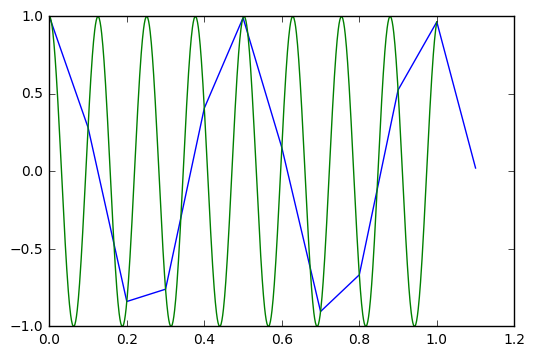

In [5]:
omega = 50
y0 = np.array([1,0])
h = 0.1
t0 = 0
te = 1

q0 = trueOSC(t0,y0,omega)[0]
q1 = trueOSC(t0+h,y0,omega)[0]
v0 = trueOSC(t0,y0,omega)[1]
v1 = trueOSC(t0+h,y0,omega)[1]

time = np.linspace(t0,te,1000)
tg,yg = gautschi(testpp,gpp,omega,h,t0,te,q0,q1,v0,v1)
true = np.array([trueOSC(t,y0,omega) for t in time])

plt.plot(tg,yg[:,0])
plt.plot(time,true[:,0])
plt.show()

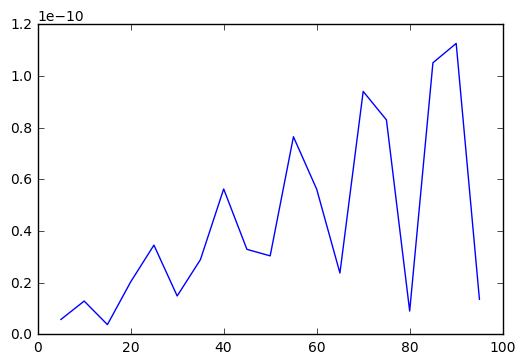

In [6]:
omegas = range(5,100,5)
y0 = np.array([1,0])
h = 0.1
t0 = 0
te = 100
    
final_err = []
for omega in omegas:
    q0 = trueOSC(t0,y0,omega)[0]
    q1 = trueOSC(t0+h,y0,omega)[0]
    v0 = trueOSC(t0,y0,omega)[1]
    v1 = trueOSC(t0+h,y0,omega)[1]
    tg,yg = gautschi(testpp,gpp,omega,h,t0,te,q0,q1,v0,v1)    
    true = trueOSC(tg[-1],y0,omega)[0]    
    final_err.append(yg[-1] - true)
    
final_err = np.array(final_err)
plt.plot(omegas,abs(final_err[:,0]))
plt.show()    

### Investigating a numerical Phenomenon

In [248]:
omegas = range(50,710,5)

energy_error = []
for omega in omegas:
    y0 = np.array([1,0])
    h = 0.02
    t0 = 0
    te = 1000


    q0 = trueOSC(t0,y0,omega)[0]
    q1 = trueOSC(t0+h,y0,omega)[0]
    v0 = trueOSC(t0,y0,omega)[1]
    v1 = trueOSC(t0+h,y0,omega)[1]

    time = np.linspace(t0,te,1000)
    tg,yg = gautschi(testpp,gpp,omega,h,t0,te,q0,q1,v0,v1)
    true = np.array([trueOSC(t,y0,omega) for t in tg])
    energy_yg = yg[:,1]**2 + omega**2 * yg[:,0]**2
    energy_true = true[:,1]**2 + omega**2 * true[:,0]**2
    
    diff = abs(energy_yg - energy_true)
    energy_error.append(np.max(diff))
    


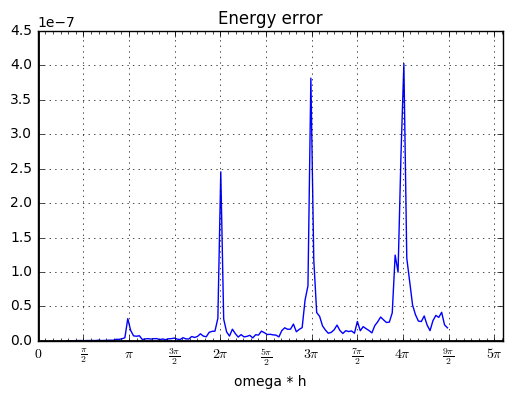

In [249]:
omegas = np.array(omegas)
energy_error = np.array(energy_error)
    
plt.plot(omegas*h,energy_error)
plt.title('Energy error')
plt.xlabel('omega * h')
ax = plt.gca()
ax.grid(True)
ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.show()    

# Nonlinear Problem

In [7]:
# First define the test function
def trueOSC_nonlin(t,c1,c2,omega_spring,omega_force):
    y = c1 * np.cos(omega_spring*t) + c2*np.sin(omega_spring*t) + np.cos(omega_force*t)/ (omega_force**2 - omega_spring**2)
    yp = -omega_spring*c1*np.sin(omega_spring*t) + omega_spring*c2*np.cos(omega_spring*t) - omega_force * np.sin(omega_force*t)/(omega_force**2 - omega_spring**2) 
    
    return np.array([y,yp])
        
def testpp_nonlin(t,y,omega_spring,omega_force):
    return -((omega_spring**2)*y) + np.cos(omega_force*t)     

def gpp_nonlin(t,y,omega_spring,omega_force):
    return -np.cos(omega_force*t)     

In [8]:
# Our solution function is faithful to the true solution
omega_spring = 3
omega_force = 3.5

y0 = np.array([1,0])

time = np.linspace(0,50,1000)
c1 = y0[0]-1/(omega_force**2 - omega_spring**2)
c2 = y0[1] / omega_spring

sol = np.array([trueOSC_nonlin(t,c1,c2,omega_spring,omega_force) for t in time])

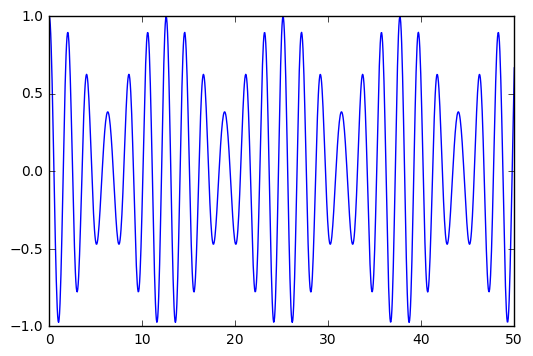

In [9]:
plt.plot(time,sol[:,0])
plt.show()

# Just plotting the NLP

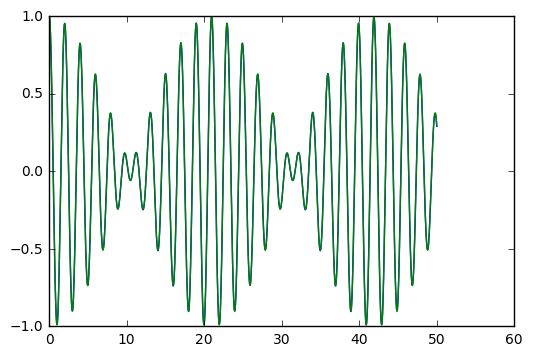

In [10]:
# Our solution function is faithful to the true solution
omega_spring = 3
omega_force = 3.3

ypp = lambda t,y,omega: testpp_nonlin(t,y,omega,omega_force)
g = lambda t,y,omega: gpp_nonlin(t,y,omega,omega_force)

h = 0.001
t0 = 0
te = 50


y0 = np.array([1,0])
time = np.linspace(0,50,1000)
c1 = y0[0]-1/(omega_force**2 - omega_spring**2)
c2 = y0[1] / omega_spring



q0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[0]
q1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[0]
v0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[1]
v1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[1]

time = np.linspace(t0,te,1000)
tg,yg = gautschi(ypp,g,omega_spring,h,t0,te,q0,q1,v0,v1)
true = np.array([trueOSC_nonlin(t,c1,c2,omega_spring,omega_force) for t in time])

plt.plot(tg,yg[:,0])
plt.plot(time,true[:,0])
plt.show()

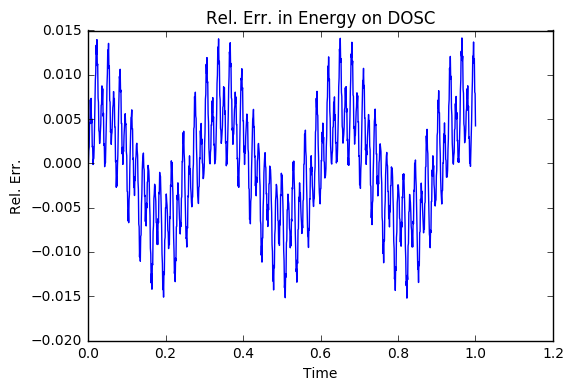

In [11]:
# Let's just plot the error associated with the energy in a single run
omega_spring = 200
omega_force = 1.1*omega_spring

ypp = lambda t,y,omega: testpp_nonlin(t,y,omega,omega_force)
g = lambda t,y,omega: gpp_nonlin(t,y,omega,omega_force)

h = 0.001
t0 = 0
te = 1


y0 = np.array([1,0])
time = np.linspace(0,50,1000)
c1 = y0[0]-1/(omega_force**2 - omega_spring**2)
c2 = y0[1] / omega_spring



q0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[0]
q1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[0]
v0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[1]
v1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[1]

time = np.linspace(t0,te,1000)
tg,yg = gautschi(ypp,g,omega_spring,h,t0,te,q0,q1,v0,v1)
true = np.array([trueOSC_nonlin(t,c1,c2,omega_spring,omega_force) for t in tg])

energy_yg = yg[:,1]**2 + omega_spring**2 * yg[:,0]**2
energy_true = true[:,1]**2 + omega_spring**2 * true[:,0]**2

plt.plot(tg,100*(energy_true-energy_yg)/energy_true) 
plt.title('Rel. Err. in Energy on DOSC')
plt.xlabel('Time')
plt.ylabel('Rel. Err.')
plt.show()

# Energy error in the NLP

In [12]:
omegas = range(50,1000,5)

energy_error = []
for omega_spring in omegas:
    omega_force = omega_spring * -20
    
    # Define the functions
    ypp = lambda t,y,omega: testpp_nonlin(t,y,omega,omega_force)
    g = lambda t,y,omega: gpp_nonlin(t,y,omega,omega_force)


    y0 = np.array([1,0])
    h = 0.02
    t0 = 0
    te = 100

    y0 = np.array([1,0])
    c1 = y0[0]-1/(omega_force**2 - omega_spring**2)
    c2 = y0[1] / omega_spring

    q0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[0]
    q1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[0]
    v0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[1]
    v1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[1]

    tg,yg = gautschi(ypp,g,omega_spring,h,t0,te,q0,q1,v0,v1)
    true = np.array([trueOSC_nonlin(t,c1,c2,omega_spring,omega_force) for t in tg])
  
    energy_yg = yg[:,1]**2 + omega_spring**2 * yg[:,0]**2
    energy_true = true[:,1]**2 + omega_spring**2 * true[:,0]**2
    
    diff = abs((energy_yg - energy_true) / energy_true)
    energy_error.append(np.max(diff))


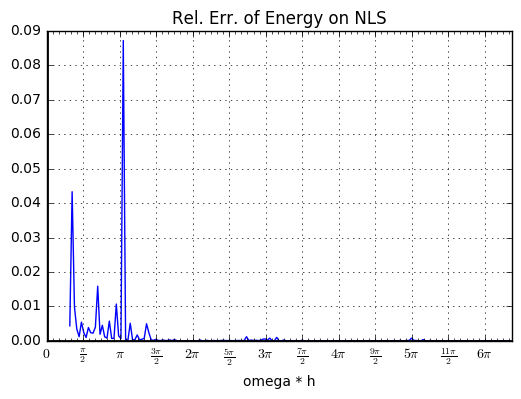

In [13]:
omegas = np.array(omegas)
energy_error = np.array(energy_error)
    
plt.plot(omegas*h,energy_error)
plt.title('Rel. Err. of Energy on NLS')
plt.xlabel('omega * h')
ax = plt.gca()
ax.grid(True)
ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.show()    

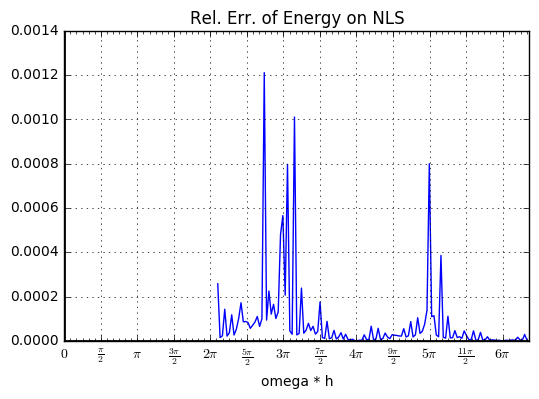

In [14]:
# Let's exclude that large middle bit to see in better detail what happens elsewhere
omegas = np.array(omegas)
energy_error = np.array(energy_error)



plt.plot(omegas[56:]*h,energy_error[56:])
plt.title('Rel. Err. of Energy on NLS')
plt.xlabel('omega * h')
ax = plt.gca()
ax.grid(True)
ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.show()    

Interesting to see how the method does really well on even multiples of $\pi$ and errors spike at odd multiples of $\pi$

# Generalized Gautschi Method's

The Gautschi update step of 

$$
y_{n+1} - 2 \cos(h \omega) y_n + y_{n-1} = h^2 \text{sinc}^2(\frac{1}{2} h \omega) g_n
$$

Naturally leads to a more general class of methods. By considering two general functions $\phi$ and $\psi$ we can rewrite Gautschi's Method and many other methods for solving HO systems as 

$$
y_{n+1} - 2 \cos(h \omega) y_n + y_{n-1} = h^2 \psi(h\omega) g(\phi(h\omega) \cdot x_n)
$$


For example Gautschi's Method can be written this way with 

$$
\psi(\cdot) = \text{sinc}^2(\frac{1}{2} \cdot) \hspace{0.1in} \phi(\cdot) = 1\\
$$


We now compare a number of methods in the way.


Gautschi:

$$
\psi(\cdot) = \text{sinc}^2(\frac{1}{2} \cdot) \hspace{0.1in} \phi(\cdot) = 1\\
$$

Deuflhard:

$$
\psi(\cdot) = \text{sinc}( \cdot) \hspace{0.1in} \phi(\cdot) = 1\\
$$


Garcia-Anchilla: 

$$
\psi(\cdot) = \text{sinc}( \cdot) \phi(\cdot) \hspace{0.1in} \phi(\cdot) = \text{sinc}( \cdot)\\
$$

Hairer + Lubich:

$$
\psi(\cdot) = \text{sinc}^2(\cdot) \hspace{0.1in} \phi(\cdot) = 1\\
$$


In [10]:
def generalized(psi,phi,ypp,g,omega,h,t0,te,q0,q1,v0,v1):    
    # ypp is the function that describes the double time derivative of position    
    # omega is the value assume to be part of the position's second derivative
    t = t0 + h   
    tsave = []
    ysave = []
    vsave = []
    
    qnm1 = q0
    vnm1 = v0
    qn = q1
    vn = v1
            
    ysave.append(qnm1)
    ysave.append(qn)
    #vsave.append(vnm1)
    vsave.append(vn)
    tsave.append(t0)
    tsave.append(t0 + h)
                
    while t <= te:
        t += h
        qnp1 = h**2 * psi(h*omega) * (g(t,phi(h*omega)*qn,omega)) + 2*np.cos(h*omega)*qn - qnm1        
        vnp1 = (qnp1 - qnm1) / (2*h*sinc(h*omega))
#         qnp1 = np.cos(h*omega)*qn + np.sin(h*omega)*vn/omega + h**2 * psi(h*omega) * g(t,phi(h*omega)*qn,omega)/2
#         vnp1 = -omega*np.sin(h*omega) *qn + np.cos(h*omega)
        
        ysave.append(qnp1)
        vsave.append(vnp1)
        tsave.append(t)
                
        qnm1 = qn
        qn = qnp1
        vnm1 = vn
        vn = vnp1
        
#     vsave = []
#     vsave.append(v0)    
#     for i in range(1,len(ysave)-1):
#         vi = (ysave[i+1] - ysave[i-1])/ (2*h)
#         vsave.append(vi)
        
#     vsave.append(vi)


    return np.array(tsave), np.array(ysave),np.array(vsave)

# Just plotting the Generalized Errors

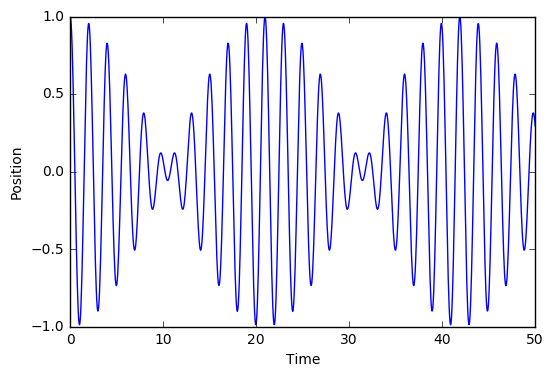

In [216]:
# Recreating Gautschi's

# These act as global vars
omega_spring = 3
omega_force = 3.3

h = 0.02
t0 = 0
te = 50




# These don't
ypp = lambda t,y,omega: testpp_nonlin(t,y,omega,omega_force)
g = lambda t,y,omega: gpp_nonlin(t,y,omega,omega_force)

psi = lambda x: sinc(x/2)**2
phi = lambda x: 1


y0 = np.array([1,0])
time = np.linspace(0,50,1000)
c1 = y0[0]-1/(omega_force**2 - omega_spring**2)
c2 = y0[1] / omega_spring



q0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[0]
q1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[0]
v0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[1]
v1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[1]

time = np.linspace(t0,te,1000)
tg,yg,vg = generalized(psi,phi,ypp,g,omega_spring,h,t0,te,q0,q1,v0,v1)
true = np.array([trueOSC_nonlin(t,c1,c2,omega_spring,omega_force) for t in time])

#plt.plot(tg,yg)
plt.plot(time,true[:,0])
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

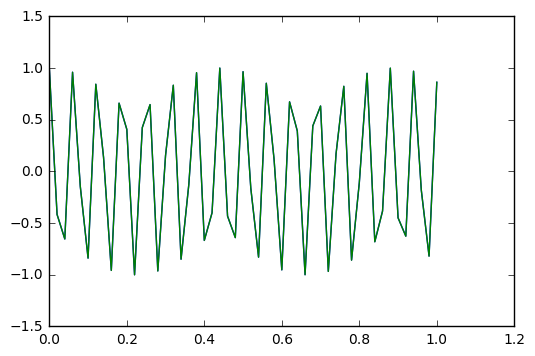

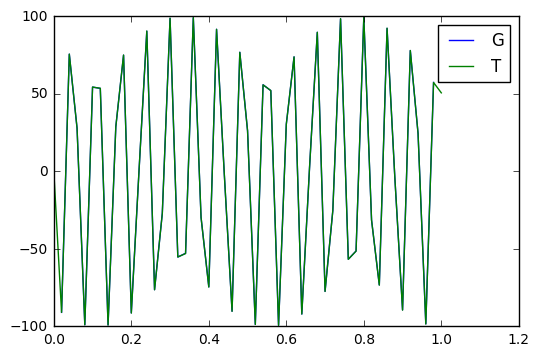

In [179]:
# Deuflhard's

ypp = lambda t,y,omega: testpp_nonlin(t,y,omega,omega_force)
g = lambda t,y,omega: gpp_nonlin(t,y,omega,omega_force)

psi = lambda x: sinc(x)
phi = lambda x: 1


y0 = np.array([1,0])
time = np.linspace(0,50,1000)
c1 = y0[0]-1/(omega_force**2 - omega_spring**2)
c2 = y0[1] / omega_spring



q0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[0]
q1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[0]
v0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[1]
v1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[1]

time = np.linspace(t0,te,1000)
tg,yg,vg = generalized(psi,phi,ypp,g,omega_spring,h,t0,te,q0,q1,v0,v1)
true = np.array([trueOSC_nonlin(t,c1,c2,omega_spring,omega_force) for t in tg])

plt.plot(tg,yg)
plt.plot(tg,true[:,0])
plt.show()

#plt.plot(tg[:-1],vg[1:])
plt.plot(tg[1:-1],vg[1:])
plt.plot(tg,true[:,1])
plt.legend(['G','T'])
plt.show()

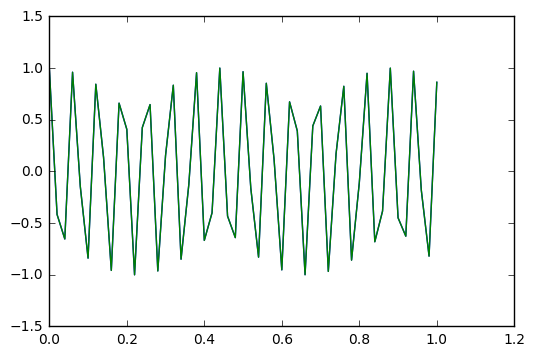

In [150]:
# Garci-Archilla

ypp = lambda t,y,omega: testpp_nonlin(t,y,omega,omega_force)
g = lambda t,y,omega: gpp_nonlin(t,y,omega,omega_force)

psi = lambda x: sinc(x)**2
phi = lambda x: 1


y0 = np.array([1,0])
time = np.linspace(0,50,1000)
c1 = y0[0]-1/(omega_force**2 - omega_spring**2)
c2 = y0[1] / omega_spring



q0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[0]
q1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[0]
v0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[1]
v1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[1]

time = np.linspace(t0,te,1000)
tg,yg,vg = generalized(psi,phi,ypp,g,omega_spring,h,t0,te,q0,q1,v0,v1)
true = np.array([trueOSC_nonlin(t,c1,c2,omega_spring,omega_force) for t in tg])

plt.plot(tg,yg)
plt.plot(tg,true[:,0])
plt.show()

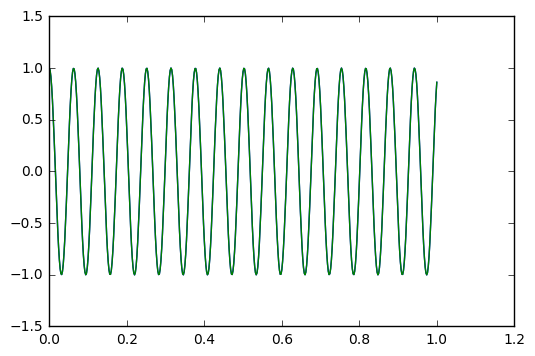

In [65]:
# Hairer-Lubich

ypp = lambda t,y,omega: testpp_nonlin(t,y,omega,omega_force)
g = lambda t,y,omega: gpp_nonlin(t,y,omega,omega_force)

psi = lambda x: sinc(x)**2
phi = lambda x: 1


y0 = np.array([1,0])
time = np.linspace(0,50,1000)
c1 = y0[0]-1/(omega_force**2 - omega_spring**2)
c2 = y0[1] / omega_spring



q0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[0]
q1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[0]
v0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[1]
v1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[1]

time = np.linspace(t0,te,1000)
tg,yg,vg = generalized(psi,phi,ypp,g,omega_spring,h,t0,te,q0,q1,v0,v1)
true = np.array([trueOSC_nonlin(t,c1,c2,omega_spring,omega_force) for t in tg])

plt.plot(tg,yg)
plt.plot(tg,true[:,0])
plt.show()

# Well that doesn't tell you much, they all seem to work

But that's to be expected if they are all proposed as methods.

Let's see what the errors look like compared to each other. First we need a way to look for errors as a function of step size.

In [57]:
hmin = 0.01
hmax = 0.9
hs = np.linspace(hmin,hmax,50)
    
    
def get_abs_err(psi,phi):

    omega_spring = 100
    omega_force = 80

    t0 = 0
    te = 1


    # These don't
    ypp = lambda t,y,omega: testpp_nonlin(t,y,omega,omega_force)
    g = lambda t,y,omega: gpp_nonlin(t,y,omega,omega_force)





    error = []
    for h in hs:
        y0 = np.array([1,0])
        time = np.linspace(0,50,100)
        c1 = y0[0]-1/(omega_force**2 - omega_spring**2)
        c2 = y0[1] / omega_spring

        q0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[0]
        q1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[0]
        v0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[1]
        v1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[1]

        time = np.linspace(t0,te,1000)
        tg,yg,vg = generalized(psi,phi,ypp,g,omega_spring,h,t0,te,q0,q1,v0,v1)
        true = np.array([trueOSC_nonlin(t,c1,c2,omega_spring,omega_force) for t in tg])

        error.append(100*abs((true[-1,0] - yg[-1])/true[-1,0]))

        
        
    return np.array(error)

def get_energy(psi,phi):

    omega_spring = 100
    omega_force = 90

    t0 = 0
    te = 100


    # These don't
    ypp = lambda t,y,omega: testpp_nonlin(t,y,omega,omega_force)
    g = lambda t,y,omega: gpp_nonlin(t,y,omega,omega_force)





    error = []
    for h in hs:
        y0 = np.array([1,0])
        time = np.linspace(0,50,100)
        c1 = y0[0]-1/(omega_force**2 - omega_spring**2)
        c2 = y0[1] / omega_spring

        q0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[0]
        q1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[0]
        v0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[1]
        v1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[1]

        time = np.linspace(t0,te,1000)
        tg,yg,vg = generalized(psi,phi,ypp,g,omega_spring,h,t0,te,q0,q1,v0,v1)
        true = np.array([trueOSC_nonlin(t,c1,c2,omega_spring,omega_force) for t in tg])
        
        energy_yg = vg**2 + omega_spring**2 * yg[:-1]**2
        energy_true = true[:,1]**2 + omega_spring**2 * true[:,0]**2


        diff = 100*abs((energy_yg - energy_true[:-1]) / energy_true[:-1])

        error.append(np.max(diff[1:-1]))

        
        
    return np.array(error),energy_yg,energy_true


psi = lambda x: sinc(x/2)**2
phi = lambda x: 1
error_gaut = get_abs_err(psi,phi)

psi = lambda x: sinc(x)**2
phi = lambda x: sinc(x)
error_garcia = get_abs_err(psi,phi)

psi = lambda x: sinc(x)
phi = lambda x: 1
error_deuf = get_abs_err(psi,phi)

psi = lambda x: sinc(x)**2
phi = lambda x: 1
error_hairer = get_abs_err(psi,phi)

psi = lambda x: sinc(x) / np.cosh(x)
phi = lambda x: 1 # Won't effect our test problem at all
error_noah = get_abs_err(psi,phi)

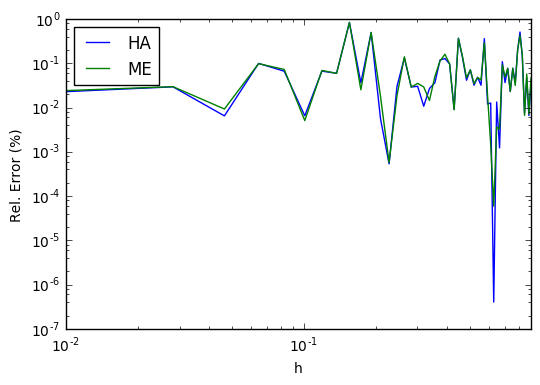

In [58]:
# plt.loglog(hs,error_gaut)
# plt.loglog(hs,error_garcia)
# plt.loglog(hs,error_deuf)
plt.loglog(hs,error_hairer)
plt.loglog(hs,error_noah)
plt.legend(['HA','ME'],loc = 'best')
#plt.legend(['GA','GC','DE','HA','ME'],loc = 'best')

plt.axvline(x=np.pi / omega_spring,linestyle = '--',color = 'grey')
plt.axvline(x=2*np.pi / omega_spring,linestyle = '--',color = 'grey')
plt.axvline(x=3*np.pi / omega_spring,linestyle = '--',color = 'grey')
plt.axvline(x=4*np.pi / omega_spring,linestyle = '--',color = 'grey')
plt.axvline(x=5*np.pi / omega_spring,linestyle = '--',color = 'grey')
plt.axvline(x=6*np.pi / omega_spring,linestyle = '--',color = 'grey')
plt.axvline(x=7*np.pi / omega_spring,linestyle = '--',color = 'grey')
plt.axvline(x=8*np.pi / omega_spring,linestyle = '--',color = 'grey')
plt.axvline(x=9*np.pi / omega_spring,linestyle = '--',color = 'grey')
plt.xlim([hmin,hmax])
plt.xlabel('h')
plt.ylabel('Rel. Error (%)')
plt.show()

# Guessing my way to success (I hope)

In [232]:
psi = lambda x: sinc(x/2)**2
phi = lambda x: 1
error_gaut,eng,ent = get_energy(psi,phi)

psi = lambda x: sinc(x)**2
phi = lambda x: sinc(x)
error_garcia,eng,ent = get_energy(psi,phi)

psi = lambda x: sinc(x)
phi = lambda x: 1
error_deuf,eng,ent = get_energy(psi,phi)

psi = lambda x: sinc(x)**2
phi = lambda x: 1
error_hair,eng,ent = get_energy(psi,phi)

psi = lambda x: sinc(x) /np.cosh(x)
phi = lambda x: 1 # Won't effect our test problem at all
error_noah,eng,ent = get_energy(psi,phi)



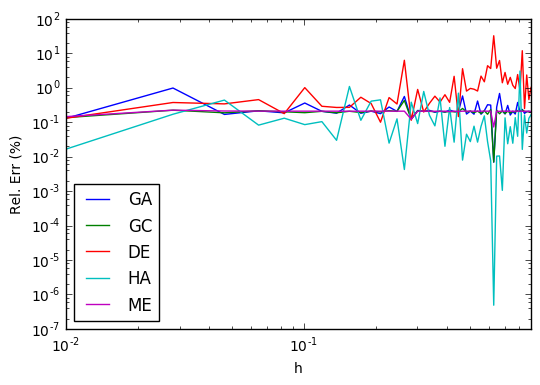

In [233]:

plt.loglog(hs,error_gaut)
plt.loglog(hs,error_garcia)
plt.loglog(hs,error_deuf)
plt.loglog(hs,error_hairer)
plt.loglog(hs,error_noah)
plt.legend(['GA','GC','DE','HA','ME'],loc = 'best')

plt.axvline(x=np.pi / omega_spring,linestyle = '--',color = 'grey')
plt.axvline(x=2*np.pi / omega_spring,linestyle = '--',color = 'grey')
plt.axvline(x=3*np.pi / omega_spring,linestyle = '--',color = 'grey')
plt.axvline(x=4*np.pi / omega_spring,linestyle = '--',color = 'grey')
plt.axvline(x=5*np.pi / omega_spring,linestyle = '--',color = 'grey')
plt.axvline(x=6*np.pi / omega_spring,linestyle = '--',color = 'grey')
plt.axvline(x=7*np.pi / omega_spring,linestyle = '--',color = 'grey')
plt.xlim([hmin,hmax])
plt.xlabel('h')
plt.ylabel('Rel. Err (%)')
plt.show()

In [251]:
omegas = range(50,710,5)
h = 0.02
    
def get_energy_error(psi,phi):
    energy_error = []
        
    for omega_spring in omegas:
        omega_force = omega_spring * -20

        # Define the functions
        ypp = lambda t,y,omega: testpp_nonlin(t,y,omega,omega_force)
        g = lambda t,y,omega: gpp_nonlin(t,y,omega,omega_force)


        y0 = np.array([1,0])

        t0 = 0
        te = 100

        y0 = np.array([1,0])
        c1 = y0[0]-1/(omega_force**2 - omega_spring**2)
        c2 = y0[1] / omega_spring

        q0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[0]
        q1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[0]
        v0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[1]
        v1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[1]

        tg,yg,vg = generalized(psi,phi,ypp,g,omega_spring,h,t0,te,q0,q1,v0,v1)
        true = np.array([trueOSC_nonlin(t,c1,c2,omega_spring,omega_force) for t in tg])

        energy_yg = vg**2 + omega_spring**2 * yg[:-1]**2
        energy_true = true[:,1]**2 + omega_spring**2 * true[:,0]**2

        diff = abs((energy_yg - energy_true[:-1]) / energy_true[:-1])

        energy_error.append(np.max(diff[1:-1]))
        

        
    return np.array(energy_error)


# Energy Error of Linear Problem



In [260]:
omegas = range(50,720,5)

def get_energy_error_lin(psi,phi):
    energy_error = []
    for omega in omegas:
        y0 = np.array([1,0])
        h = 0.02
        t0 = 0
        te = 500


        q0 = trueOSC(t0,y0,omega)[0]
        q1 = trueOSC(t0+h,y0,omega)[0]
        v0 = trueOSC(t0,y0,omega)[1]
        v1 = trueOSC(t0+h,y0,omega)[1]

        #time = np.linspace(t0,te,1000) 

        tg,yg,vg = generalized(psi,phi,testpp,gpp,omega,h,t0,te,q0,q1,v0,v1)
        true = np.array([trueOSC(t,y0,omega) for t in tg])

        energy_yg = vg**2 + omega**2 * yg[:-1]**2
        energy_true = true[:,1]**2 + omega**2 * true[:,0]**2

        #diff = abs((energy_yg - energy_true[:-1]) / energy_true[:-1])
        diff = abs((energy_yg - energy_true[:-1]))

        energy_error.append(np.max(diff[1:-1]))

    return energy_error

In [263]:
omegas = np.array(omegas)

psi = lambda x: sinc(x/2)**2
phi = lambda x: 1
error_gaut = get_energy_error_lin(psi,phi)

psi = lambda x: sinc(x)**2
phi = lambda x: sinc(x)
error_garcia = get_energy_error_lin(psi,phi)

psi = lambda x: sinc(x)
phi = lambda x: 1
error_deuf = get_energy_error_lin(psi,phi)

psi = lambda x: sinc(x)**2
phi = lambda x: 1
error_hairer = get_energy_error_lin(psi,phi)

psi = lambda x: sinc(x) /np.cosh(x)
phi = lambda x: 1 # Won't effect our test problem at all
error_noah = get_energy_error_lin(psi,phi)

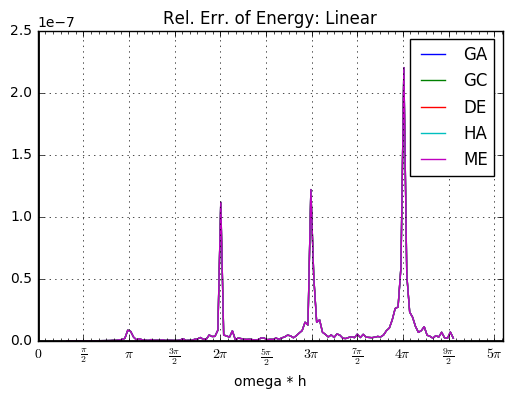

In [265]:
omegas = np.array(omegas)
plt.plot(omegas*h,error_gaut)
plt.plot(omegas*h,error_garcia)
plt.plot(omegas*h,error_deuf)
plt.plot(omegas*h,error_hairer)
plt.plot(omegas*h,error_noah)

plt.title('Rel. Err. of Energy: Linear')
plt.xlabel('omega * h')
ax = plt.gca()
plt.legend(['GA','GC','DE','HA','ME'],loc = 'best')
ax.grid(True)
ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.show()   

# Get Energy Error Non-Lin

In [266]:
omegas = np.array(omegas)

psi = lambda x: sinc(x/2)**2
phi = lambda x: 1
error_gaut = get_energy_error(psi,phi)

psi = lambda x: sinc(x)**2
phi = lambda x: sinc(x)
error_garcia = get_energy_error(psi,phi)

psi = lambda x: sinc(x)
phi = lambda x: 1
error_deuf = get_energy_error(psi,phi)

psi = lambda x: sinc(x)**2
phi = lambda x: 1
error_hairer = get_energy_error(psi,phi)

psi = lambda x: sinc(x) /np.cosh(x)
phi = lambda x: 1 # Won't effect our test problem at all
error_noah = get_energy_error(psi,phi)


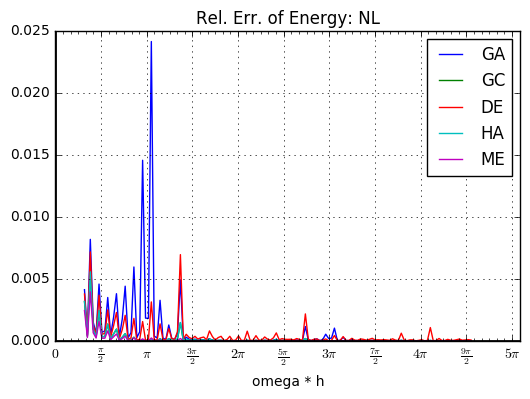

In [280]:
plt.plot(omegas*h,error_gaut)
plt.plot(omegas*h,error_garcia)
plt.plot(omegas*h,error_deuf)
plt.plot(omegas*h,error_hairer)
plt.plot(omegas*h,error_noah)

plt.title('Rel. Err. of Energy: NL')
plt.xlabel('omega * h')
ax = plt.gca()
ax.grid(True)
plt.legend(['GA','GC','DE','HA','ME'],loc = 'best')
ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.show()   

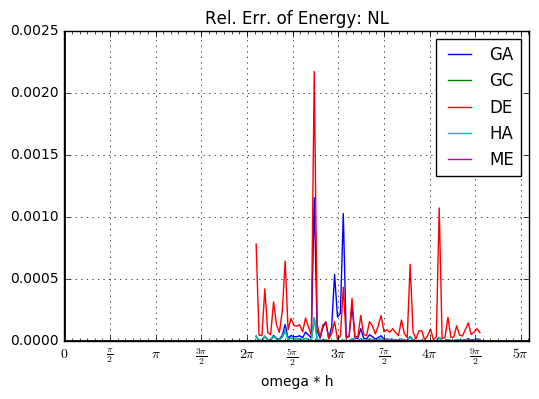

In [281]:

plt.plot(omegas[56:]*h,error_gaut[56:])
plt.plot(omegas[56:]*h,error_garcia[56:])
plt.plot(omegas[56:]*h,error_deuf[56:])
plt.plot(omegas[56:]*h,error_hairer[56:])
plt.plot(omegas[56:]*h,error_noah[56:])


plt.title('Rel. Err. of Energy: NL')
plt.xlabel('omega * h')
ax = plt.gca()
ax.grid(True)
plt.legend(['GA','GC','DE','HA','ME'],loc = 'best')
ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.show()  

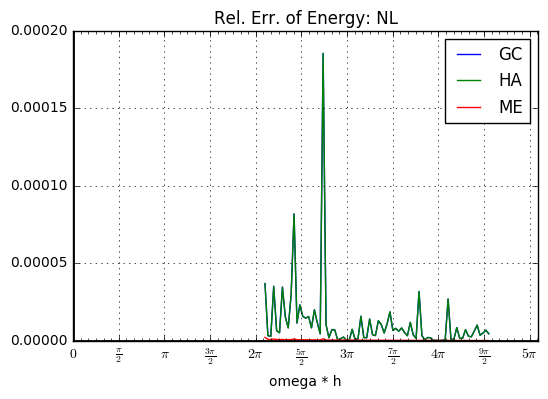

In [290]:

#plt.plot(omegas[56:]*h,error_gaut[56:])

plt.plot(omegas[56:]*h,error_garcia[56:])
plt.plot(omegas[56:]*h,error_hairer[56:])
plt.plot(omegas[56:]*h,error_noah[56:])


plt.title('Rel. Err. of Energy: NL')
plt.xlabel('omega * h')
ax = plt.gca()
ax.grid(True)
plt.legend(['GC','HA','ME'],loc = 'best')
ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.ylim([0,0.0002])
plt.show()  

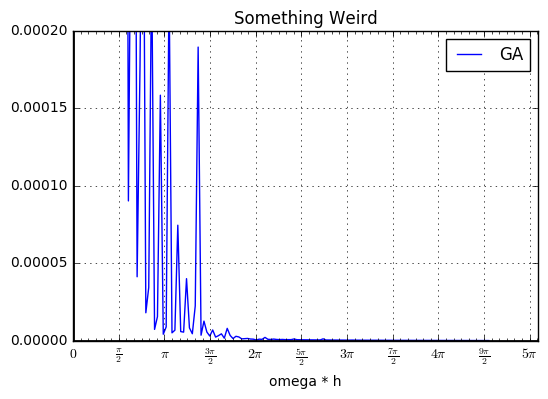

In [289]:

#plt.plot(omegas[56:]*h,error_gaut[56:])

# plt.plot(omegas[56:]*h,error_garcia[56:])
# plt.plot(omegas[56:]*h,error_hairer[56:])
plt.plot(omegas*h,error_noah)


plt.title('Something Weird')
plt.xlabel('omega * h')
ax = plt.gca()
ax.grid(True)
plt.legend(['ME'],loc = 'best')
ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.ylim([0,0.0002])
plt.show()  

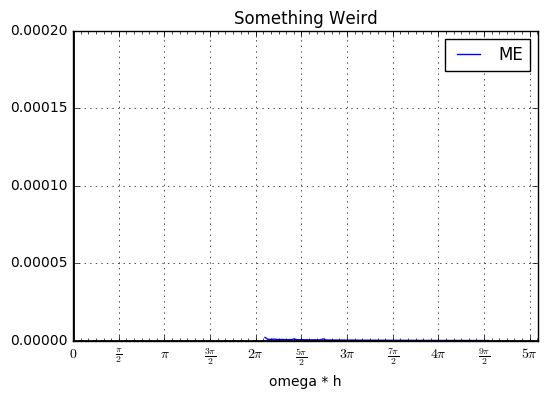

In [291]:

#plt.plot(omegas[56:]*h,error_gaut[56:])

# plt.plot(omegas[56:]*h,error_garcia[56:])
# plt.plot(omegas[56:]*h,error_hairer[56:])
plt.plot(omegas[56:]*h,error_noah[56:])


plt.title('Something Weird')
plt.xlabel('omega * h')
ax = plt.gca()
ax.grid(True)
plt.legend(['ME'],loc = 'best')
ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.ylim([0,0.0002])
plt.show()  

In [61]:
import pdb

omegas = range(700,1100,5)
h = 0.02
    
def get_energy_error(psi,phi):
    energy_error = []
        
    for omega_spring in omegas:
        omega_force = omega_spring * -20

        # Define the functions
        ypp = lambda t,y,omega: testpp_nonlin(t,y,omega,omega_force)
        g = lambda t,y,omega: gpp_nonlin(t,y,omega,omega_force)


        y0 = np.array([1,0])

        t0 = 0
        te = 300

        y0 = np.array([1,0])
        c1 = y0[0]-1/(omega_force**2 - omega_spring**2)
        c2 = y0[1] / omega_spring

        q0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[0]
        q1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[0]
        v0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[1]
        v1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[1]

        tg,yg,vg = generalized(psi,phi,ypp,g,omega_spring,h,t0,te,q0,q1,v0,v1)
        true = np.array([trueOSC_nonlin(t,c1,c2,omega_spring,omega_force) for t in tg])

        energy_yg = vg**2 + omega_spring**2 * yg[:-1]**2
        energy_true = true[:,1]**2 + omega_spring**2 * true[:,0]**2
        

        diff = abs((energy_yg - energy_true[:-1]) / energy_true[:-1])

        energy_error.append(np.max(diff[1:-1]))
        

        
    return np.array(energy_error)




# psi = lambda x: sinc(x)**2
# phi = lambda x: 1
# error_hairer = get_energy_error(psi,phi)


psi = lambda x: sinc(x) /np.cosh(x)
phi = lambda x: 1 # Won't effect our test problem at all
error_noah = get_energy_error(psi,phi)

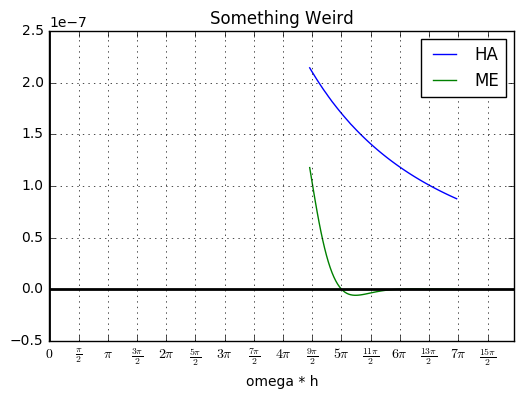

In [62]:
omegas = np.array(omegas)
#plt.plot(omegas*h,error_hairer)
plt.plot(omegas*h,error_noah)
plt.plot(omegas*h,psi(omegas*h))


plt.title('Something Weird')
plt.xlabel('omega * h')
ax = plt.gca()
ax.grid(True)
plt.legend(['HA','ME'],loc = 'best')
ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.show()  


# plt.plot(omegas[56:]*h,error_noah[56:])
# plt.title('Something Weird')
# plt.xlabel('omega * h')
# ax = plt.gca()
# ax.grid(True)
# plt.legend(['ME'],loc = 'best')
# ax.axhline(0, color='black', lw=2)
# ax.axvline(0, color='black', lw=2)
# ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
# ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
# plt.show()  

In [35]:
def get_energy_error(psi,phi):
    energy_error = []
        
    for omega_spring in omegas:
        omega_force = omega_spring * -20

        # Define the functions
        ypp = lambda t,y,omega: testpp_nonlin(t,y,omega,omega_force)
        g = lambda t,y,omega: gpp_nonlin(t,y,omega,omega_force)


        y0 = np.array([1,0])

        t0 = 0
        te = 1

        y0 = np.array([1,0])
        c1 = y0[0]-1/(omega_force**2 - omega_spring**2)
        c2 = y0[1] / omega_spring

        q0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[0]
        q1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[0]
        v0 = trueOSC_nonlin(t0,c1,c2,omega_spring,omega_force)[1]
        v1 = trueOSC_nonlin(t0+h,c1,c2,omega_spring,omega_force)[1]

        tg,yg,vg = generalized(psi,phi,ypp,g,omega_spring,h,t0,te,q0,q1,v0,v1)
        true = np.array([trueOSC_nonlin(t,c1,c2,omega_spring,omega_force) for t in tg])

#         energy_yg = vg**2 + omega_spring**2 * yg[:-1]**2
#         energy_true = true[:,1]**2 + omega_spring**2 * true[:,0]**2
        

        diff = abs((yg[:-1] - true[:,:-1]) / true[:,:-1])

        energy_error.append(np.max(diff[1:-1]))
        

        
    return np.array(energy_error)

In [44]:
omegas = range(80,100,5)
h = 0.001

psi = lambda x: sinc(x) /np.cosh(x)
phi = lambda x: 1 # Won't effect our test problem at all
error_noah = get_energy_error(psi,phi)

psi = lambda x: sinc(x)**2
phi = lambda x: 1
error_hairer = get_energy_error(psi,phi)

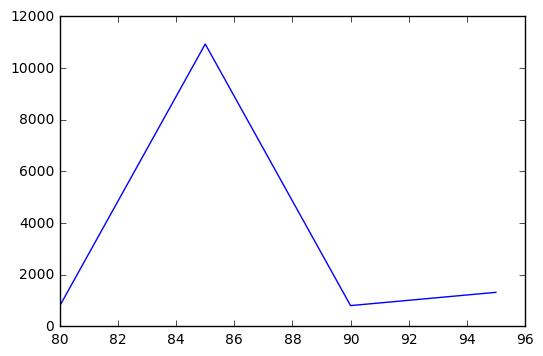

In [47]:
plt.plot(omegas,error_noah)
plt.plot(omegas,error_hairer)
plt.show()

In [63]:
psi(2*3.14)

-1.9004220792801724e-06